# Pc5 Analysis

This notebook contains code relevant to my postdoc work (cf. [NSF 2218996](https://www.nsf.gov/awardsearch/showAward?AWD_ID=2218996&HistoricalAwards=false)). 

Approach 1: Standard Tools Based on Visual Inspection
- [x] Obtain event lists that have already been generated based on satellite measurements: [8](https://doi.org/10.1029/2020ja027962) for
THEMIS, [22](https://doi.org/10.1029/2019ja027754) for MMS.
- [ ] Perform data reduction: Reduce events to include only those with sufficient ground magnetometer coverage and where the transients occurred within +/-2 hours local time of the 40-degree magnetic meridian. This region is selected because of the density of ground stations available in both hemispheres; if time permits, other meridians will also be examined.
- [ ] Generate survey plots of north-south hemisphere magnetometer data comparable to the results shown in Figures 2 and 3. Perform visual inspection to identify Pc5 wave activity and record properties (north-south hemisphere asymmetry, spatial localization, amplitude, associated with isolated transient or train of transients), or record null results. In parallel, use automated data processing techniques to quantify band-integrated ULF wave power before, during, and after each event at each magnetometer station, as well as identify peaks in the power spectrum. The same tools will be used as in past statistical studies of ULF waves (e.g.,[23](https://doi.org/10.1029/2007ja012483) and [13](https://doi.org/10.1029/2021ja029115)). Generate survey plots showing the wave power as a function of latitude in both
hemispheres, as has been done in past studies (e.g., [24](https://doi.org/10.1029/2020ja028048)), and use these as further tools to quantify north-south hemisphere asymmetries of wave power and spatial localization of wave activity.

In [1]:
# Importing packages
import pandas as pd
smag = __import__('supermag-api')          # SuperMAG python API
logon = 'kd8oxt'                              # SuperMAG ID

import plotly.express as px                # for mapping, mainly
import plotly.graph_objects as go          # for mapping, mainly

# import os
# # os.environ["CDF_LIB"] = library_directory
# # os.environ["CDF_LIB"] = "~/CDF/lib"          # default "~/CDF/lib"
# from spacepy import pycdf                  # for reading CDF files

# For pulling data from CDAweb:
from ai import cdas
import datetime
from matplotlib import pyplot as plt

# for progress viz:
from tqdm import tqdm

import pickle

In [2]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 '20220726-04-17-supermag-stations.csv',
 '20220726-04-23-supermag-stations.txt',
 'conjugate_stations.csv',
 'JGRA_56056_2019JA027754-sup-0006-Data_Set_SI-S01.txt',
 'Pc5 Plots - V1.ipynb',
 'Pc5 Plots.ipynb',
 'README.md',
 'References and Notes',
 'supermag-api.py',
 'THEMIS_2008_2011_subsolar_magnetosheath_jet_2SC_data_set.txt',
 'themis_event_list_with_coords.csv',
 'themis_event_list_with_coords.pkl',
 '__pycache__']

## Obtain Event Lists and Perform Data Reduction
Both event lists are saved in this folder as .txt files.


First, the THEMIS list. The columns contain:
*    column 1: 2SC data set entry number
*    column 2: reference spacecraft (A: THEMIS-A, ..., E: THEMIS-E)
*    column 3: reference spacecraft jet number
*    column 4: reference spacecraft maximum dynamic pressure ratio time in UT
*    column 5: second spacecraft  (A: THEMIS-A, ..., E: THEMIS-E)
*    column 6: second spacecraft distance to reference spacecraft in Earth radii
*    column 7: second spacecraft jet number (0 if inapplicable)

In [3]:
# # Original import code for THEMIS event list: 
# themis_events = pd.read_fwf('THEMIS_2008_2011_subsolar_magnetosheath_jet_2SC_data_set.txt', comment = '#', skiprows=25, names = ['Ref Spacecraft', 'Ref Jet Number', 'Datetime', 'Spacecraft 2', 'Spacecraft 2 Distance', 'Spacecraft 2 Jet Number'])
# themis_events['Datetime']= pd.to_datetime(themis_events['Datetime']) # cast to datetime
# themis_events = themis_events.set_index('Datetime')
# themis_events

# # code for checking S/C locations:

# # Let's start by adding columns for SM latitude coordinates of our two spacecraft.
# themis_events["S1_SM_LON"] = " "
# themis_events["S2_SM_LON"] = " "


# for event in tqdm(range(len(themis_events))):
# # for event in tqdm(range(10)):
#     try:
#         epoch = themis_events.index[event].to_pydatetime()

#         data = cdas.get_data(
#             'sp_phys',
#             'TH' + themis_events.iloc[event]['Ref Spacecraft']+ '_OR_SSC',
#             epoch,
#             epoch + datetime.timedelta(minutes=15), 
#             ['SM_LON']
#         )
#         themis_events.loc[epoch, 'S1_SM_LON'] = data['SM_LON'][0]


#         data = cdas.get_data(
#             'sp_phys',
#             'TH' + themis_events.loc[epoch]['Spacecraft 2']+ '_OR_SSC',
#             epoch,
#             epoch + datetime.timedelta(minutes=10), 
#             ['SM_LON']
#         )

#         themis_events.loc[epoch, 'S2_SM_LON'] = data['SM_LON'][0]
#     except Exception as e:
#         print(e)
#         continue
    

# themis_events.head()


# # And finally, write them to recoverable files:
# themis_events.to_csv('themis_event_list_with_coords.csv', encoding='utf-8')
# themis_events.to_pickle('themis_event_list_with_coords.pkl')

with open('themis_event_list_with_coords.pkl', 'rb') as f:
    themis_events = pickle.load(f)
    
themis_events

Ref Spacecraft  Ref Jet Number Spacecraft 2  \
Datetime                                                          
2008-08-17 23:58:54              A               4            E   
2008-08-18 21:51:18              A              18            E   
2009-09-17 16:52:58              A             128            D   
2009-09-17 16:57:21              A             129            D   
2009-09-17 17:32:34              A             130            D   
...                            ...             ...          ...   
2011-12-29 20:51:31              E             845            D   
2011-12-29 22:51:03              E             846            D   
2011-12-29 22:56:42              E             850            D   
2011-12-30 23:54:33              E             854            D   
2011-12-30 23:57:47              E             857            D   

                     Spacecraft 2 Distance  Spacecraft 2 Jet Number S1_SM_LON  \
Datetime                                                                        
2008-08-17 23:58:54                   2.70                        0   9.04097   
2008-08-18 21:51:18                   1.43                     2167   10.2829   
2009-09-17 16:52:58                   3.09                        0   14.3394   
2009-09-17 16:57:21                   3.06                        0   14.5817   
2009-09-17 17:32:34                   2.85                        0   16.2748   
...                                    ...                      ...       ...   
2011-12-29 20:51:31                   0.42                        0   339.716   
2011-12-29 22:51:03                   0.39                        0   345.111   
2011-12-29 22:56:42                   0.39                        0    345.37   
2011-12-30 23:54:33                   0.38                        0   347.884   
2011-12-30 23:57:47                   0.38                        0   348.067   

                    S2_SM_LON  
Datetime                       
2008-08-17 23:58:54   21.9697  
2008-08-18 21:51:18   14.4688  
2009-09-17 16:52:58   2.98592  
2009-09-17 16:57:21   3.29747  
2009-09-17 17:32:34   5.43812  
...                       ...  
2011-12-29 20:51:31   338.465  
2011-12-29 22:51:03   344.356  
2011-12-29 22:56:42   344.637  
2011-12-30 23:54:33   347.444  
2011-12-30 23:57:47   347.644  

[662 rows x 7 columns]

Next, the MMS event list. The following datalist contains the time of maximum dynamic pressure for each jet along with its class:
* Quasi-parallel jet = Class 1
* Quasi-perpendicular jet = Class 2
* Boundary jet = Class 3
* Encapsulated jet = Class 5 

In [4]:
mms_events = pd.read_fwf('JGRA_56056_2019JA027754-sup-0006-Data_Set_SI-S01.txt', comment = '%', skiprows=15, names = ['Datetime', 'Jet Class'])
mms_events['Datetime']= pd.to_datetime(mms_events['Datetime']) # cast to datetime
mms_events = mms_events.set_index('Datetime')
mms_events

Jet Class
Datetime                      
2015-09-07 20:10:33          1
2015-09-09 08:49:47          1
2015-09-09 08:55:56          1
2015-09-09 09:01:47          1
2015-09-18 12:39:28          1
...                        ...
2017-01-08 10:46:21          5
2017-01-15 08:48:19          5
2017-01-25 09:58:36          5
2018-02-26 09:43:41          5
2018-11-18 13:46:40          5

[1282 rows x 1 columns]

### Check Magnetometer Coverage
Check the magnetometer coverage for the dates of interest and winnow out those events which do not have sufficient coverage.


<nobr>![TODO](https://img.shields.io/badge/TODO-orange)</nobr>Install CDF; write fcn for automated checking of CDF files from http://mist.nianet.org/ and http://flux.phys.uit.no/geomag.html.
See if spacepy can help with this.

Here's some example code for INTERMAGNET: https://www.geophysik.uni-muenchen.de/~wack/teaching/Python/10_pandas.html
(We do -not- have to roll our own: https://github.com/INTERMAGNET )

This looks promising too: https://github.com/geomagpy/magpy

May be some useful stuff here: https://heliopython.org/projects/

This is cool: https://geodyn.univ-grenoble-alpes.fr/ 

For computing conjugates: https://omniweb.gsfc.nasa.gov/vitmo/cgm.html

<nobr>![TODO](https://img.shields.io/badge/TODO-orange)</nobr> Clean up station map... fix .csv file to ditch extra columns, plot only the polar stations.


In [5]:
stations = pd.read_csv('conjugate_stations.csv') # TODO: FIX THIS FILE!
stations

Station Name Code Geographic Unnamed: 3 Geomagnetic conjugate  \
0                 NaN  NaN   Latitude  Longitude              Latitude   
1                 NaN  PG0     ?83.67      88.68                   NaN   
2                 NaN  PG1     ?84.50       77.2                   NaN   
3                 NaN  PG2     ?84.42      57.95                   NaN   
4                 NaN  PG3     ?84.81      37.63                   NaN   
5                 NaN  PG4     ?83.34      12.25                   NaN   
6                 NaN  PG5     ?81.96       5.71                   NaN   
7               Thule  THL      77.47     290.77                   NaN   
8          Savissivik  SVS      76.02      294.9                   NaN   
9          Kullorsuaq  KUV      74.57     302.82                   NaN   
10          Upernavik  UPN      72.78     303.85                   NaN   
11             Umanaq  UMQ      70.68     307.87                   NaN   
12            Godhavn  GDH      69.25     306.47                   NaN   
13               Attu  ATU      67.93     306.43                   NaN   
14  Sondre Stromfjord  STF      67.02     309.28                   NaN   
15       Sukkertoppen  SKT      65.42      307.1                   NaN   
16           Godthaab  GHB      64.17     308.27                   NaN   
17      Frederikshaab  FHB         62     310.32                   NaN   

    Unnamed: 5 Unnamed: 6  
0          NaN  Longitude  
1         78.7       38.2  
2         77.3       37.3  
3         75.5       39.1  
4         73.8       36.6  
5         71.1       36.1  
6         69.7         37  
7         84.4       27.5  
8         82.7       31.2  
9         80.4       40.3  
10        78.6       38.7  
11        76.0       41.2  
12        74.8       38.2  
13        73.5       37.1  
14        72.1         40  
15        70.9       36.4  
16        69.5       37.1  
17        66.9       38.4

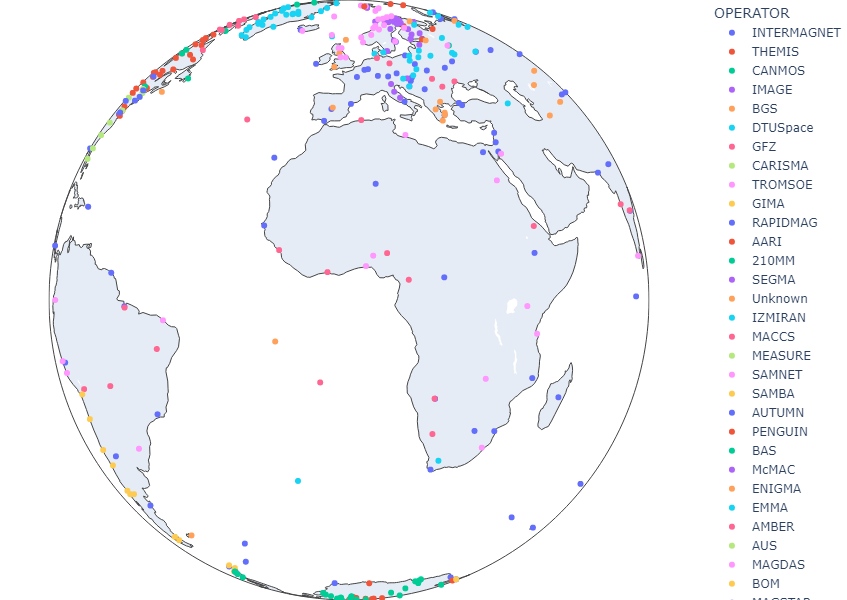

In [6]:
stations = pd.read_csv('20220726-04-17-supermag-stations.csv', sep = ',')   # edited version of this spreadsheet
# TODO: Reduce this dataframe to include only the regions of interest

fig = px.scatter_geo(stations, 
                     lat = stations.GEOLAT,
                     lon = stations.GEOLON,
                     color="OPERATOR", # size of markers, "pop" is one of the columns of gapminder
                     hover_name = "STATION-NAME", 
                     # text = "IAGA"
                     )
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#TODO: Overplot 40 deg magnetic meridian .... maybe I can pull this from geopack?


In [7]:
# Example code for checking coverage from SuperMAG:
start=[2019,11,15,10,40,00] # alt: start='2019-11-15T10:40'
(status,stations) = smag.SuperMAGGetInventory(logon,start,3600)
# print(stations)   


In [8]:
# Open CDF files...

link = 'http://mist.nianet.org/CDFdata/pg0/2015/thg_l2_mag_pg0_20150101_v01.cdf'

### Check Magnetic Meridian
Consider only the cases where transients occurred within +/-2 hours local time of the 40-degree magnetic meridian. This region is selected because of the density of ground stations available in both hemispheres; if time permits, other meridians will also be examined.

To check this, we'll pull satellite coordinates from https://cdaweb.gsfc.nasa.gov/. Using orbit parameters for spacecraft of interest (e.g., `THA_OR_SSC`), we can find their positions in a cylindrical coordinate system around Earth. We can then check if their longitude in SM coordinates is within 60&deg; of the latitude of our ground stations, since 60&deg; maps to +/- 2 hours out of 24.

<nobr>![TODO](https://img.shields.io/badge/TODO-orange)</nobr> Comment/rearrange redundant code. Eliminate those events where the spacecraft aren't close enough to the ground stations. (Also, I've saved a document in the References and Notes folder that reviews different magnetic coordinate systems. Should review that too.)

In [9]:
# # sample code for using ai.cdas to pull SM longitude for THEMIS A:

# # from ai import cdas
# # from datetime import datetime
# # from matplotlib import pyplot as plt

# data = cdas.get_data(
#     'sp_phys',
#     'THA_OR_SSC',
#     datetime.datetime(2008, 8, 18, 21, 51, 18),
#     datetime.datetime(2008, 8, 18, 21, 59, 59),
#     ['SM_LON']
# )
# plt.plot(data['EPOCH'], data['SM_LON'])
# plt.show()

# data

Let's eliminate those events from the THEMIS event list where either spacecraft is outside the 2 hour window. 

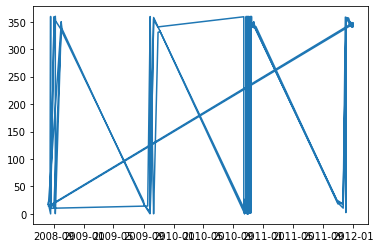

In [10]:
themis_events
plt.plot(themis_events['S1_SM_LON'])
plt.show()

In [11]:
# Drop all rows where SM_LON for either spacecraft is outside a window of 40 degrees plus or minus 30 degrees. 
# (This corresponds to a range of +/- 2 hours.)

with open('themis_event_list_with_coords.pkl', 'rb') as f:
    themis_events = pickle.load(f)
    
themis_events = themis_events.dropna()    # drop rows with missing values



pm = 30   # 30 degrees of margin

# themis_filtered = themis_events[themis_events['S1_SM_LON'] <= 40 + pm]
# themis_filtered = themis_events.drop(themis_events[(themis_events['S1_SM_LON'] <= 40 - pm) ].index)
                                                  #  | (themis_events['S1_SM_LON'] >= 40 + pm)
                                                  #  | (themis_events['S2_SM_LON'] <= 40 - pm)
                                                  #  | (themis_events['S2_SM_LON'] >= 40 + pm)
                                                  # ].index)
themis_events = themis_events.drop(themis_events[(themis_events['S1_SM_LON'] <= 40 - pm) ].index)
themis_events = themis_events.drop(themis_events[(themis_events['S1_SM_LON'] >= 40 + pm) ].index)
# themis_events = themis_events.drop(themis_events[(themis_events['S2_SM_LON'] <= 40 - pm) ].index)
# themis_events = themis_events.drop(themis_events[(themis_events['S2_SM_LON'] >= 40 + pm) ].index)

# themis_events['S2_SM_LON'].astype(int)

themis_events

Ref Spacecraft  Ref Jet Number Spacecraft 2  \
Datetime                                                          
2008-08-18 21:51:18              A              18            E   
2009-09-17 16:52:58              A             128            D   
2009-09-17 16:57:21              A             129            D   
2009-09-17 17:32:34              A             130            D   
2010-10-13 17:49:14              A             372            D   
...                            ...             ...          ...   
2011-10-31 19:08:42              E             770            A   
2011-10-31 19:22:39              E             771            A   
2011-10-31 19:25:16              E             772            A   
2011-10-31 19:31:48              E             775            A   
2011-11-21 23:37:00              E             783            D   

                     Spacecraft 2 Distance  Spacecraft 2 Jet Number S1_SM_LON  \
Datetime                                                                        
2008-08-18 21:51:18                   1.43                     2167   10.2829   
2009-09-17 16:52:58                   3.09                        0   14.3394   
2009-09-17 16:57:21                   3.06                        0   14.5817   
2009-09-17 17:32:34                   2.85                        0   16.2748   
2010-10-13 17:49:14                   0.60                        0    10.379   
...                                    ...                      ...       ...   
2011-10-31 19:08:42                   1.08                        0   22.8152   
2011-10-31 19:22:39                   1.10                      646   23.4144   
2011-10-31 19:25:16                   1.10                        0   23.5439   
2011-10-31 19:31:48                   1.10                        0   23.7975   
2011-11-21 23:37:00                   0.34                        0    17.925   

                    S2_SM_LON  
Datetime                       
2008-08-18 21:51:18   14.4688  
2009-09-17 16:52:58   2.98592  
2009-09-17 16:57:21   3.29747  
2009-09-17 17:32:34   5.43812  
2010-10-13 17:49:14   13.2911  
...                       ...  
2011-10-31 19:08:42   19.2435  
2011-10-31 19:22:39    19.832  
2011-10-31 19:25:16   19.9591  
2011-10-31 19:31:48   20.2073  
2011-11-21 23:37:00   17.2563  

[110 rows x 7 columns]

## Generate Survey Plots

The goal is to generate survey plots similar to Figure 2:
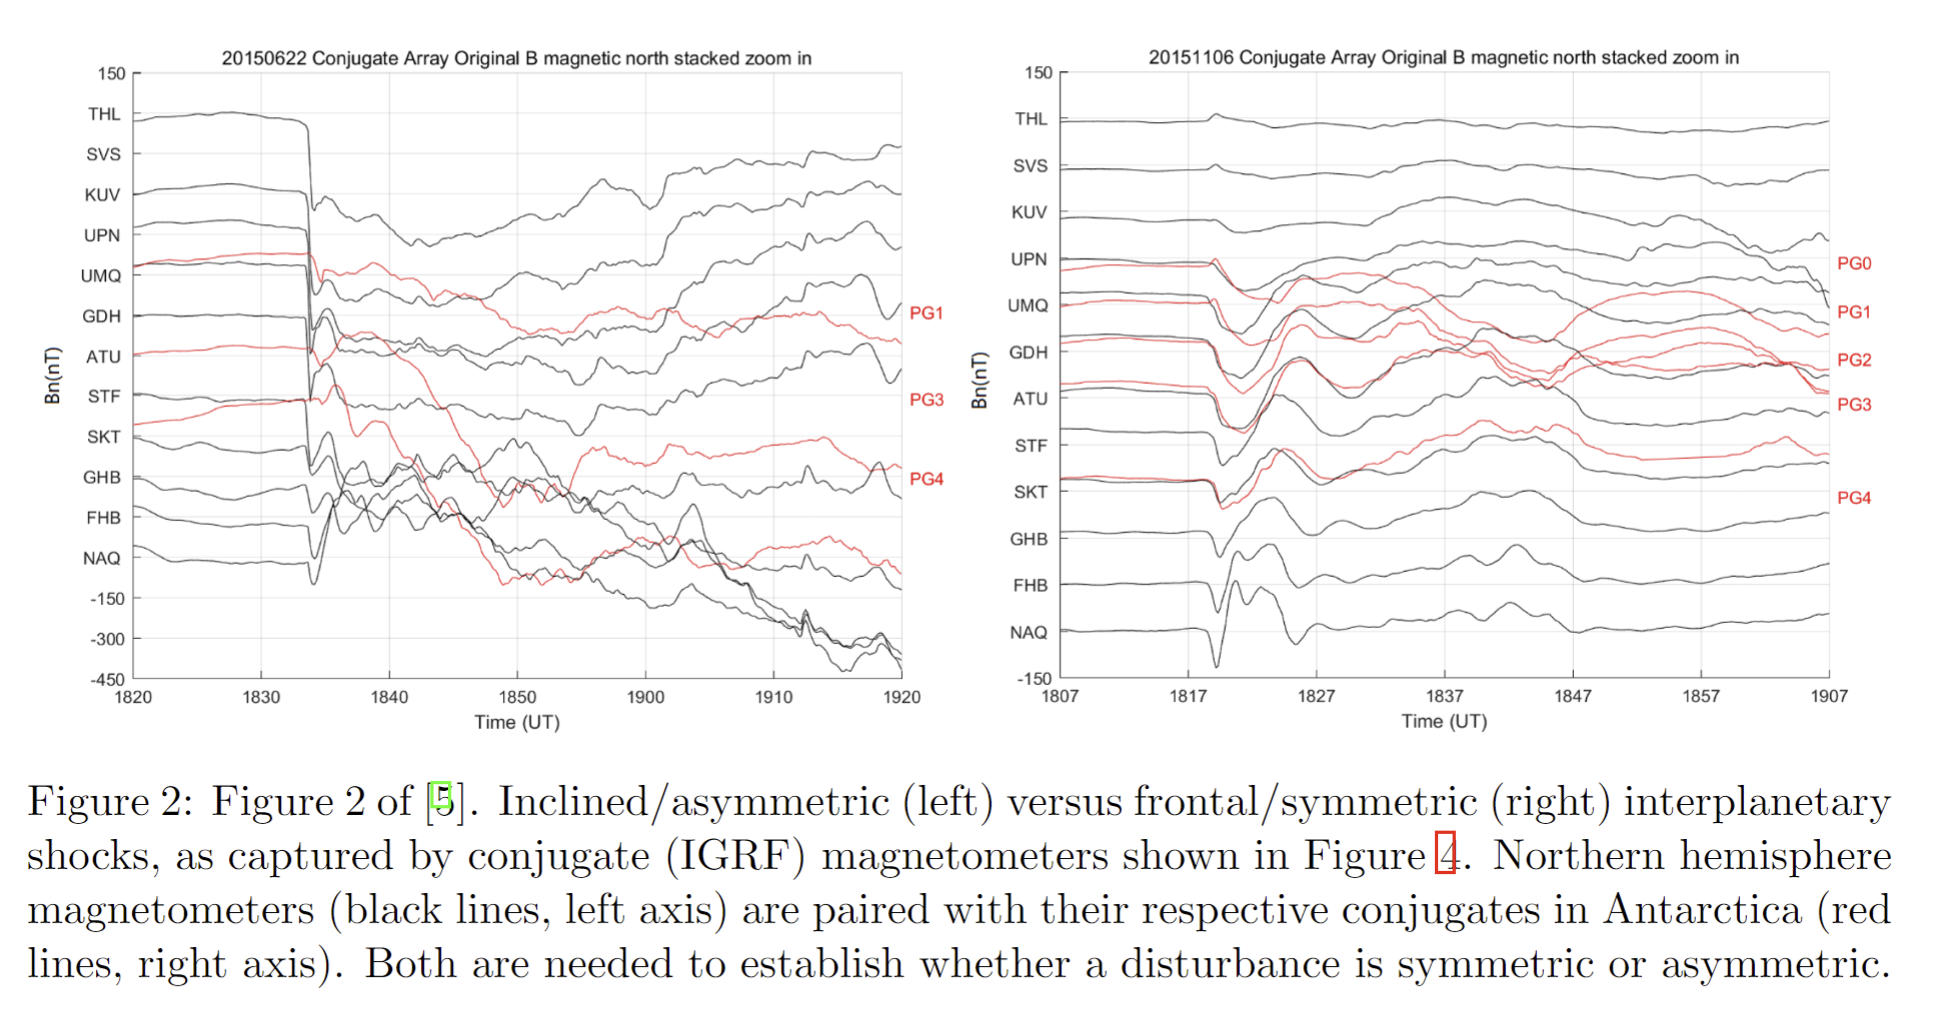

....and Figure 3: 
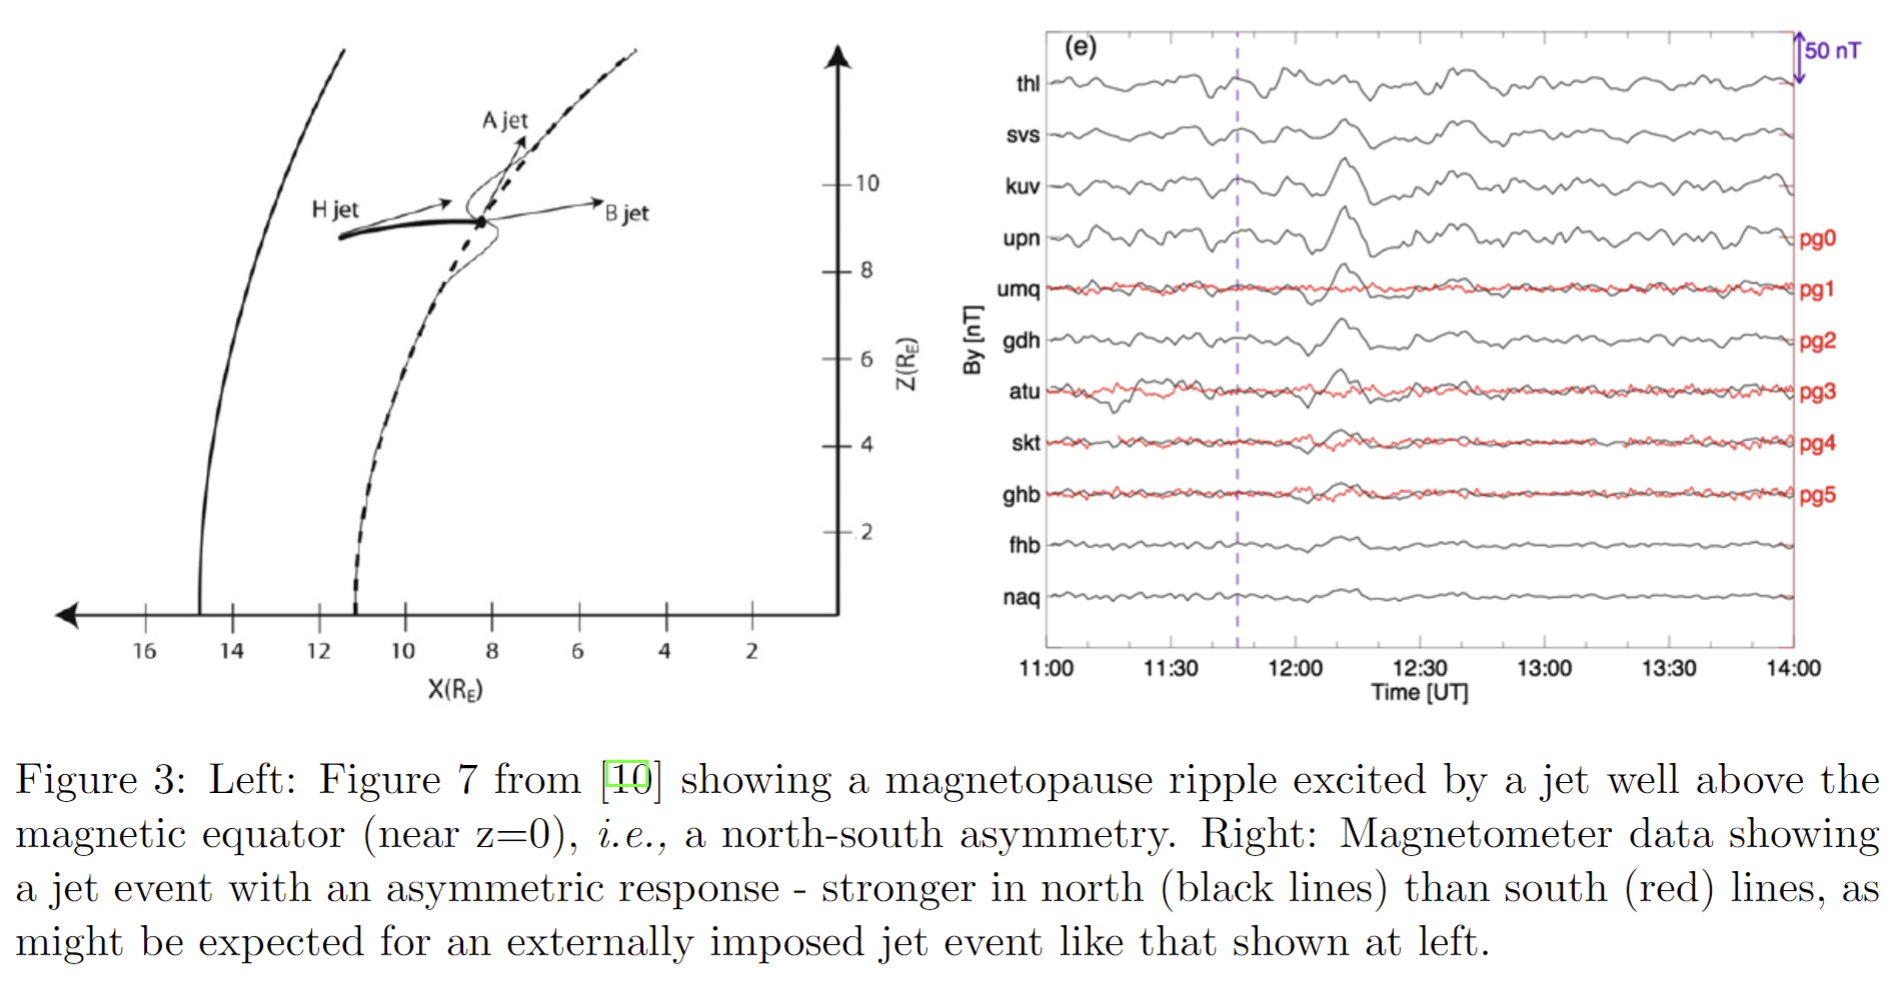

<nobr>![TODO](https://img.shields.io/badge/TODO-orange)</nobr> Fix x-axis labels. Add conjugate mags on matching axes in a different color. Figure out why the plotting is mixed up... may need to ask stackoverflow. Add title label from parameter, date.

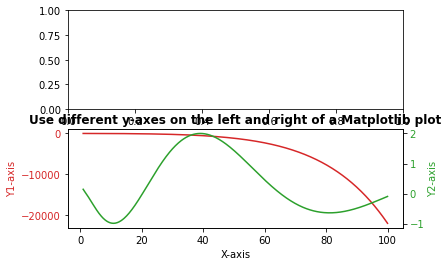

In [33]:
# # TESTING

# import numpy as np
# import matplotlib.pyplot as plt
# x = np.arange(0, 10, 0.1)
# y1 = 0.05 * x**2
# y2 = -1 *y1

# fig, ax1 = plt.subplots(2)

# # ax2 = ax1.twinx()
# ax1.plot(x, y1, 'g-')
# ax2.plot(x, y2, 'b-')

# ax1.set_xlabel('X data')
# ax1.set_ylabel('Y1 data', color='g')
# ax1.right_ax.set_ylabel('Y2 data', color='b')

# plt.show()

##########################################
# import libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Creating dataset
x = np.arange(1.0, 100.0, 0.191)
dataset_1 = np.exp(x**0.25) - np.exp(x**0.5)
dataset_2 = np.sin(0.4 * np.pi * x**0.5) + np.cos(0.8 * np.pi * x**0.25)
 
# Creating plot with dataset_1
fig, ax1 = plt.subplots(2)
 
color = 'tab:red'
ax1[1].set_xlabel('X-axis')
ax1[1].set_ylabel('Y1-axis', color = color)
ax1[1].plot(x, dataset_1, color = color)
ax1[1].tick_params(axis ='y', labelcolor = color)
 
# Adding Twin Axes to plot using dataset_2
ax2 = ax1[1].twinx()
 
color = 'tab:green'
ax2.set_ylabel('Y2-axis', color = color)
ax2.plot(x, dataset_2, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
 
# Adding title
plt.title('Use different y-axes on the left and right of a Matplotlib plot', fontweight ="bold")
 
# Show plot
plt.show()

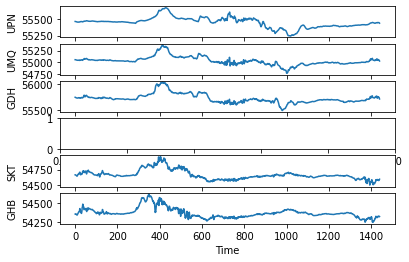

In [42]:
# import matplotlib.pyplot as plt
# import numpy as np

def magfig(
    parameter = 'VERTICAL_DOWN_-_Z',
    start = datetime.datetime(2018, 8, 18, 0, 0, 0), 
    end = datetime.datetime(2018, 8, 19, 0, 0, 0), 
    maglist_a = ['upn', 'umq', 'gdh', 'atu', 'skt', 'ghb'],
    maglist_b = ['pg0', 'pg1', 'pg2', 'pg3', 'pg4', 'pg5']
):
        fig, axs = plt.subplots(len(maglist_a))
        for idx, magname in enumerate(maglist_a):   # Plot Arctic mags:
            try:
                data = cdas.get_data(
                    'sp_phys',
                    'THG_L2_MAG_'+ magname.upper(),
                    start,
                    end,
                    ['thg_mag_'+ magname]
                )
                data['UT_1'] = pd.to_datetime(data['UT_1'], unit='s')
                x =data['UT_1']
                y =data[parameter]
                axs[idx].plot(y)#x, y)
                axs[idx].set(xlabel='Time', ylabel=magname.upper())
            except:
                continue
        for idx, magname in enumerate(maglist_b):   # Plot corresponding conjugate mags:
            ax2 = ax1[1].twinx()
            try:
                data = cdas.get_data(
                    'sp_phys',
                    'THG_L2_MAG_'+ magname.upper(),
                    start,
                    end,
                    ['thg_mag_'+ magname]
                )
                data['UT_1'] = pd.to_datetime(data['UT_1'], unit='s')
                x =data['UT_1']
                y =data[parameter]
                
                color = 'tab:red'
                ax2.set_ylabel('Y2-axis', color = color)
                ax2.plot(y, dataset_2, color = color)
                ax2.tick_params(axis ='y', labelcolor = color)
                # ax2.plot(y, color='r')#x, y)
                # ax2.set_ylabel(magname.upper())
                # ax2.tick_params(axis ='y', labelcolor = 'r')
            except:
                continue
        # return fig
    
magfig()